<a href="https://colab.research.google.com/github/lopespaloma/predicao-avc-projeto-datascience/blob/main/modelo_knn_avc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
dataset = pd.read_csv("dados-regressao-logistica-tratados.csv", delimiter=",")
dataset

,Idade,Hipertensao,Doenca Cardiaca,Estado Civil,Nivel medio de glicose,IMC,AVC,Female,Male,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban,formerly smoked,never smoked,smokes
0,38.0,0,0,1,183.43,38.1,0,1,0,0,0,1,0,0,1,0,1,0,0
1,72.0,1,0,1,74.63,23.1,1,1,0,0,0,1,0,0,1,0,1,0,0
2,45.0,0,0,1,103.22,20.5,0,1,0,1,0,0,0,0,0,1,0,1,0
3,68.0,0,0,1,92.21,27.3,0,0,1,0,0,1,0,0,0,1,0,1,0
4,80.0,1,0,1,68.56,26.2,1,1,0,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,59.0,0,0,1,116.44,23.8,1,1,0,0,0,1,0,0,1,0,0,0,1
494,59.0,0,0,1,211.78,28.1,1,0,1,0,0,1,0,0,1,0,1,0,0
495,79.0,0,0,1,110.85,24.1,1,1,0,0,0,1,0,0,0,1,1,0,0
496,63.0,0,0,1,196.81,35.9,0,0,1,0,0,1,0,0,1,0,0,1,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dataset.drop('AVC', axis=1),
                                                    dataset['AVC'],
                                                    random_state=1,
                                                    test_size=0.3)
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0])

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.23333333333333334
MSE: 0.23333333333333334
RMSE: 0.48304589153964794


<Axes: xlabel='Idade', ylabel='IMC'>

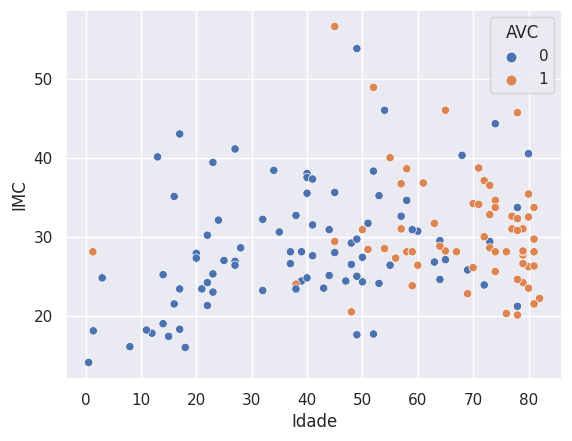

In [ ]:
sns.scatterplot(x='Idade',
                y='IMC',
                hue='AVC',
                data=x_test.join(y_test, how='outer'))

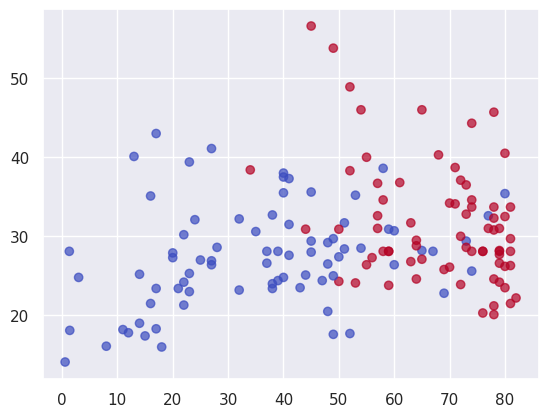

In [ ]:
plt.scatter(x_test['Idade'],
            x_test['IMC'],
            c=y_pred,
            cmap='coolwarm',
            alpha=0.7)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[64, 21],
       [14, 51]])

In [ ]:
scores = []
for i in range(2000):
  x_train, x_test, y_train, y_test = train_test_split(dataset.drop('AVC', axis=1), dataset['AVC'])
  model = KNeighborsClassifier()
  model.fit(x_train, y_train)
  precisao = model.score(x_test, y_test)
  scores.append(precisao)

Média: 73.98%
Desvio padrão: 3.35%


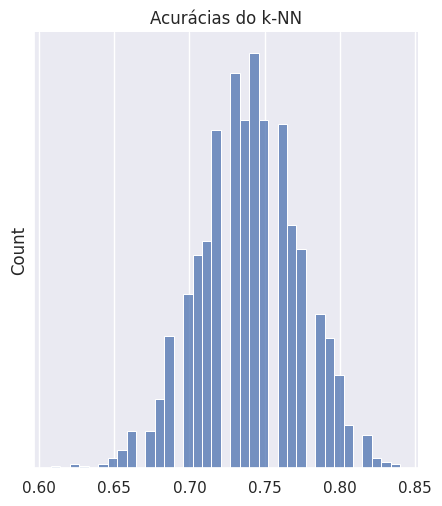

In [ ]:
print("Média: {:.2f}%".format(np.mean(scores)*100))
print("Desvio padrão: {:.2f}%".format(np.std(scores)*100))
sns.displot(scores)
plt.yticks([])
plt.title("Acurácias do k-NN")
plt.show()